# 1. SESSION : Sklearn Deep Dive 

https://youtu.be/YyFuIubbqpo

## Estimators

- Object that can learn from data.


- __Has a .fit() method__


- You can create Custom estimators

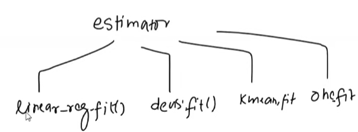

## Types of estimators:

### 1. Predictors : 
- Predicts on new data based on learning from training data
- Has a __.predict()__ function
- eg: All ML algos

#### Types of Predictors:


1. reg predict : predictions are numerical in nature


2. Classification predict
    - predict classes(1, 0)
    - predict_proba - prediction in terms of probability (0.23, 0.31)

### 2. __Transformers__:
- Learns on training data and try to transform new data based on it.
- __has a .transform / .fit_transform() method in it.__
- eg: ohe, minmax scaler, standardscaler, ordinalencodr, PCA

### NOTE : 
Clustering algorithms are estimators which only have fit() method. They don't have .predict() or .fit_transform()

## Custom Estimators / Predictors: For Estimators Not present in scikit learn


- Custom estimators in scikit-learn are user-defined classes that implement the scikit-learn
estimator interface. These are crafted to fit specific modeling or pre-processing needs that
are not directly met by the built-in estimators provided by scikit-learn. 



- Custom estimators
can range from simple modifications of existing algorithms to entirely new algorithms
developed for unique tasks.


- The creation of a custom estimator involves defining a Python class that adheres to certain
conventions and implements required methods, ensuring it __integrates seamlessly with
scikit-learn's broader ecosystem, including pipelines, cross-validation tools, and
hyperparameter tuning utilities.__

### Key Components of Custom Estimators:

1. __Consistency with the Estimator Interface :__ At a minimum, a custom estimator must
implement a fit method. If it's a transformer (for pre-processing), it should also implement
a transform method, and if it's a predictor (for modeling), it should implement a predict
method.


2. __Inheritance from Base Classes :__ Custom estimators often inherit from base classes like
BaseEstimator and optionally ClassifierMixin, RegressorMixin, or TransformerMixin,
depending on their purpose. This inheritance brings in useful methods and ensures
compatibility with scikit-learn's utilities.


3. __Parameters and Initialization :__ Custom estimators should allow parameters to be set via the
constructor (i.e., __init__ method), following the pattern of scikit-learn's estimators.
Parameters should be explicitly declared in the __init__ method and stored as instance
variables.


4. __Parameter Validation :__ It's good practice to validate parameters and inputs, using scikit-
learn's utilities like check_X_y for input validation and check_array for validating features.

#### Custom Estimator Code:

- Counts Majority class for a classification problem. The majprity class becomes the output for any new row.

#### Scoring Function

___Steps:___

- inherit from BaseEstimator class 


- inherit from ClassifierMixin for classifcation problems or RegressorMixin for regression problems


- create a constructor in class in which all attributes will be defined.


- create a .fit() with all learning logic for the algorithm


- .predict() will predict on that logic

In [1]:
from sklearn.utils import check_X_y

In [2]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score
import numpy as np

In [3]:
class MostFrequentClassClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.most_frequent_ = None

    def fit(self, X, y):
        # Ensure y is 1D
        y = np.ravel(y)

        # Compute the most frequent class
        unique_classes, counts = np.unique(y, return_counts=True)
        self.most_frequent_ = unique_classes[np.argmax(counts)]
        return self

    def predict(self, X):
        if self.most_frequent_ is None:
            raise ValueError("This classifier instance is not fitted yet.")
        # Predict the most frequent class for each input sample
        return np.full(shape=(X.shape[0],), fill_value=self.most_frequent_)

    def score(self, X, y):
        """Return the mean accuracy on the given test data and labels."""
        # Ensure y is 1D
        y = np.ravel(y)

        # Generate predictions
        predictions = self.predict(X)

        # Calculate and return the accuracy
        return accuracy_score(y, predictions)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load data
iris = load_iris()
X, y = iris.data, iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Initialize and fit the custom estimator
classifier = MostFrequentClassClassifier()
classifier.fit(X_train, y_train)

# Make predictions
predictions = classifier.predict(X_test)

# Evaluate the custom estimator
print(f"Predicted class for all test instances: {predictions[0]}")


Predicted class for all test instances: 1


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load a dataset
iris = load_iris()
X, y = iris.data, iris.target

# Simplify to a binary classification problem
is_class_0_or_1 = y < 2
X_bin = X[is_class_0_or_1]
y_bin = y[is_class_0_or_1]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_bin, y_bin, test_size=0.2, random_state=42)

# Initialize and fit the custom classifier
classifier = MostFrequentClassClassifier()
classifier.fit(X_train, y_train)

# Evaluate the classifier using the score method
score = classifier.score(X_test, y_test)
print(f"Accuracy of the MostFrequentClassClassifier: {score}")


Accuracy of the MostFrequentClassClassifier: 0.4


In [6]:
classifier.most_frequent_

1

In [7]:
from sklearn.model_selection import cross_val_score

cross_val_score(classifier, X_train, y_train)

array([0.5625, 0.5625, 0.5   , 0.5   , 0.5   ])

### Mixins

Mixin classes in scikit-learn are auxiliary classes that provide additional methods and
functionality to custom estimators. They are designed to be used through multiple inheritance,
allowing custom estimators to gain standardized capabilities, such as scoring, fitting,
predicting, or transforming, without needing to reimplement these methods from scratch.


- __Scoring :__ The __ClassifierMixin and RegressorMixin__ provide a default implementation of the __score
method__ for classification and regression estimators, respectively.


- __Transformation :__ The __TransformerMixin__ provides a __fit_transform method__, allowing
transformation estimators to both learn and apply a transformation in a single step.


- __Fitting and Predicting :__ The __ClusterMixin__ adds the __fit_predict__ method to clustering estimators,
enabling them to fit to the data and then return cluster labels.

## Transformers

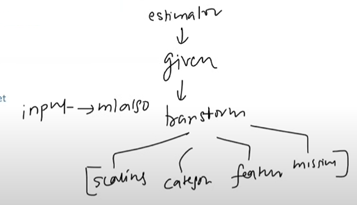

- In scikit-learn, a transformer is a specific type of estimator that is used for transforming
datasets. 


- Transformers are designed to pre-process data, which can include tasks such as
scaling, encoding categorical variables, handling missing values, and feature extraction. 


- The
main goal of a transformer is to modify or create new features from the original dataset in a
way that makes the data more suitable for modeling by machine learning algorithms.


- __Contains a fit and a transform(fit_transform) method.__


Examples:
- StandardScalar
- MinMax Scaler
- OHE
- Ordinal Encoder
- SimpleImputer
- PCA
- Count Vectoriser

#### Main disadvantage of Transformer

1. Can be applied only to the entire dataset. Not on 1 column


2. Can't cover every use case

### Transformer Code : 

In [8]:
from sklearn.datasets import make_regression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Generate some data
X, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=42)

# Use the transformer directly
X_transformed = StandardScaler().fit_transform(X)


LinearRegression().fit(X_transformed, y)


LinearRegression()

## Custom Transformer

Custom transformers in scikit-learn are user-defined transformers that are designed to carry
out specific data transformations or pre-processing steps that are not covered by the built-in
transformers in scikit-learn.


Creating custom transformers is a powerful way to incorporate domain-specific knowledge or
custom data processing logic into your machine learning pipelines.


Ways to Create Custom Transformers:

1. __Functions Approach (Function Transformers)__ 
    - for simpler transformations where you don't need to learn from data (stateless)<br></br>
    - eg : Square transform, log transform, reciprocal etc. They don't need to learn anything from the data


2. __Class Approach (From BaseEstimator and TransformerMixin)__ 
    - for complex transformations where you need to learn from data<br></br>
    - standard scaler etc

### Custom Transformer using Function Transformer : cubes the given data

In [9]:
import numpy as np

def cube(x):

    return np.power(x,3)


In [10]:
from sklearn.preprocessing import FunctionTransformer

# Create the custom transformer
cube_transformer = FunctionTransformer(cube)


##### applying the custom transformer:

In [11]:
from sklearn.datasets import make_regression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Generate some data
X, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=42)

# Use the transformer directly
X_transformed = cube_transformer.transform(X)

LinearRegression().fit(X_transformed, y)


LinearRegression()

### Custom Transformer using BaseEstimator and TransformerMixin:

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

In [13]:
class MedianIQRScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.medians_ = None
        self.iqr_ = None

    def fit(self, X, y=None):
        # Calculate medians and interquartile range for each feature
        self.medians_ = np.median(X, axis=0)
        Q1 = np.percentile(X, 25, axis=0)
        Q3 = np.percentile(X, 75, axis=0)
        self.iqr_ = Q3 - Q1

        # Handle case where IQR is 0 to avoid division by zero during transform
        self.iqr_[self.iqr_ == 0] = 1
        return self

    def transform(self, X):
        # Check if fit has been called
        if self.medians_ is None or self.iqr_ is None:
            raise RuntimeError("The transformer has not been fitted yet.")

        # Scale features using median and IQR learned during fit
        return (X - self.medians_) / self.iqr_


#### using the custom transformer : 

In [14]:
from sklearn.datasets import make_blobs

# Generate synthetic data
X, _ = make_blobs(n_samples=100, n_features=2, centers=3, random_state=42)

# Initialize the transformer
scaler = MedianIQRScaler()

# Fit the scaler to the data
scaler.fit(X)

# Transform the data
X_scaled = scaler.transform(X)

# Check the first few rows of the transformed data
print("Transformed data (first 5 rows):")
print(X_scaled[:5])


Transformed data (first 5 rows):
[[-0.49872679 -0.71613207]
 [ 0.78423675 -0.08192868]
 [-0.03656645  0.52987512]
 [ 0.84159877 -0.09379661]
 [-0.3814692  -0.57206564]]


## Composite Transformer : 

A composite transformer refers to a transformer that is built from multiple other transformers
or estimators, combining their functionalities to apply a series of transformations or
processing steps in a specific way.


##### Types :


1. Column Transformer


2. Pipeline


3. Feature Union

## 1. Column Transformer : 

- The ColumnTransformer is a feature transformer from scikit-learn that allows different
columns or column subsets of the input dataset to be transformed separately and the features
generated by each transformer to be concatenated into a single feature space. 


- This is
particularly useful for datasets that contain various types of data requiring different
preprocessing steps, such as numerical data that needs scaling and categorical data that needs
to be encoded.

##### What is allowed in Column Transformer?
Transformers, Function Transformers, Custom Transformers, Pipelines, Feature Unions

### Code Example

In [15]:
import pandas as pd
import numpy as np

# Define the data with numeric labels for sentiment
data = {
    "Social Media Platform": ["Twitter", "Facebook", "Instagram", "Twitter", "Facebook",
                              "Instagram", "Twitter", "Facebook", "Instagram", "Twitter"],
    "Review": ["Love the new update!", "Too many ads now", "Great for sharing photos",
               "Newsfeed algorithm is biased", "Privacy concerns with latest update",
               "Amazing filters!", "Too much spam", "Easy to connect with friends",
               "Stories feature is fantastic", "Customer support lacking"],
    "age": [21, 19, np.nan, 17, 24, np.nan, 30, 19, 16, 31],
    "Sentiment": [1, 0, 1, 0, 0, 1, 0, 1, 1, 0]  # Numeric labels: 1 for Positive, 0 for Negative
}

# Create a DataFrame
df = pd.DataFrame(data)

df

,Social Media Platform,Review,age,Sentiment
0,Twitter,Love the new update!,21.0,1
1,Facebook,Too many ads now,19.0,0
2,Instagram,Great for sharing photos,NaN,1
3,Twitter,Newsfeed algorithm is biased,17.0,0
4,Facebook,Privacy concerns with latest update,24.0,0
5,Instagram,Amazing filters!,NaN,1
6,Twitter,Too much spam,30.0,0
7,Facebook,Easy to connect with friends,19.0,1
8,Instagram,Stories feature is fantastic,16.0,1
9,Twitter,Customer support lacking,31.0,0


In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [17]:
# Define the column transformer
column_transformer = ColumnTransformer(
    transformers=[
        ('platform_ohe', OneHotEncoder(), ['Social Media Platform']),
        ('review_bow', CountVectorizer(), 'Review'),
        ('age_impute', SimpleImputer(),['age'])
    ],
    remainder='drop'  # Drop other columns not specified in transformers
)

##### even providing column number will work:

In [18]:
pd.DataFrame(column_transformer.fit_transform(df).toarray(),columns=column_transformer.get_feature_names_out())

,platform_ohe__Social Media Platform_Facebook,platform_ohe__Social Media Platform_Instagram,platform_ohe__Social Media Platform_Twitter,review_bow__ads,review_bow__algorithm,review_bow__amazing,review_bow__biased,review_bow__concerns,review_bow__connect,review_bow__customer,...,review_bow__sharing,review_bow__spam,review_bow__stories,review_bow__support,review_bow__the,review_bow__to,review_bow__too,review_bow__update,review_bow__with,age_impute__age
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,21.000
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19.000
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.125
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.000
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,24.000
5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.125
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30.000
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,19.000
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,16.000
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,31.000


## 2. Feature Union

- __Applies multiple transformers parallely on the entire dataset__


- Resultant dataset will be combination of all the transformers concatinated  together.

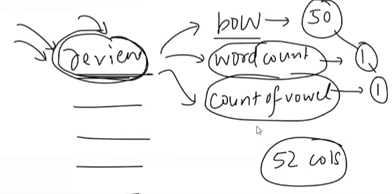

In [19]:
import pandas as pd
import numpy as np

# Generating a random dataset with 10 rows and 4 columns
np.random.seed(42)  # For reproducibility
data = np.random.randn(10, 4)

# Creating a DataFrame and naming the columns
df = pd.DataFrame(data, columns=['f1', 'f2', 'f3', 'y'])

df

,f1,f2,f3,y
0,0.496714,-0.138264,0.647689,1.523030
1,-0.234153,-0.234137,1.579213,0.767435
2,-0.469474,0.542560,-0.463418,-0.465730
3,0.241962,-1.913280,-1.724918,-0.562288
4,-1.012831,0.314247,-0.908024,-1.412304
5,1.465649,-0.225776,0.067528,-1.424748
6,-0.544383,0.110923,-1.150994,0.375698
7,-0.600639,-0.291694,-0.601707,1.852278
8,-0.013497,-1.057711,0.822545,-1.220844
9,0.208864,-1.959670,-1.328186,0.196861


In [20]:
df.shape

(10, 4)

In [21]:
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA

In [22]:
# Define FeatureUnion
feature_union = FeatureUnion([
    ('scaler', StandardScaler()),  # Apply StandardScaler
    ('pca', PCA(n_components=2))   # Apply PCA, reduce to 2 components
])

In [23]:
X_transformed = feature_union.fit_transform(df.drop(columns=['y']))

df_transformed = pd.DataFrame(X_transformed, columns=feature_union.get_feature_names_out())
df_transformed

,scaler__f1,scaler__f2,scaler__f3,pca__pca0,pca__pca1
0,0.815293,0.418360,0.947878,-1.025659,-0.425413
1,-0.282292,0.302777,1.873701,-1.772532,-0.358223
2,-0.635686,1.239158,-0.156427,-0.327888,1.038742
3,0.432718,-1.721587,-1.410206,1.911072,-0.689960
4,-1.451676,0.963905,-0.598312,0.193153,1.371662
5,2.270396,0.312856,0.371269,-0.511760,-0.891133
6,-0.748180,0.718778,-0.839795,0.484280,1.020731
7,-0.832663,0.233387,-0.293870,0.191723,0.583958
8,0.049080,-0.690119,1.121664,-0.726878,-0.811461
9,0.383011,-1.777515,-1.015903,1.584488,-0.838903


In [24]:
df_transformed.shape

(10, 5)

## 3. Pipeline

- __Applies multiple transformers on the entire dataset but sequentially__




In [25]:
import pandas as pd
import numpy as np

# Generating a random dataset with 10 rows and 4 columns
np.random.seed(42)  # For reproducibility
data = np.random.randn(10, 4)

# Creating a DataFrame and naming the columns
df = pd.DataFrame(data, columns=['f1', 'f2', 'f3', 'y'])

df

,f1,f2,f3,y
0,0.496714,-0.138264,0.647689,1.523030
1,-0.234153,-0.234137,1.579213,0.767435
2,-0.469474,0.542560,-0.463418,-0.465730
3,0.241962,-1.913280,-1.724918,-0.562288
4,-1.012831,0.314247,-0.908024,-1.412304
5,1.465649,-0.225776,0.067528,-1.424748
6,-0.544383,0.110923,-1.150994,0.375698
7,-0.600639,-0.291694,-0.601707,1.852278
8,-0.013497,-1.057711,0.822545,-1.220844
9,0.208864,-1.959670,-1.328186,0.196861


In [26]:
from sklearn.pipeline import Pipeline

In [27]:
# Define FeatureUnion
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Apply StandardScaler
    ('pca', PCA(n_components=2))
])

In [28]:
pd.DataFrame(pipeline.fit_transform(X), columns=pipeline.get_feature_names_out())

,pca0,pca1
0,1.967289,0.189197
1,-0.980541,1.140597
2,-0.696192,-1.069669
3,-1.049030,1.246446
4,1.562347,0.140628
...,...,...
95,-0.673056,-1.107907
96,-0.960615,-0.890179
97,-1.014953,0.817791
98,1.401202,0.194052


### Slightly Complex Example : Combination of all

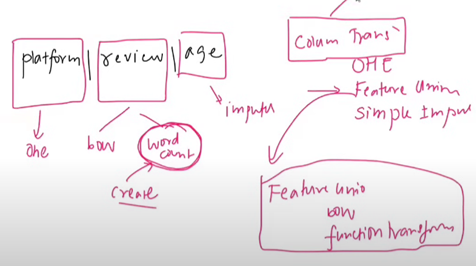

In [29]:
import pandas as pd

# Define the data with numeric labels for sentiment
data = {
    "Social Media Platform": ["Twitter", "Facebook", "Instagram", "Twitter", "Facebook",
                              "Instagram", "Twitter", "Facebook", "Instagram", "Twitter"],
    "Review": ["Love the new update!", "Too many ads now", "Great for sharing photos",
               "Newsfeed algorithm is biased", "Privacy concerns with latest update",
               "Amazing filters!", "Too much spam", "Easy to connect with friends",
               "Stories feature is fantastic", "Customer support lacking"],
    "age": [21, 19, np.nan, 17, 24, np.nan, 30, 19, 16, 31],
    "Sentiment": [1, 0, 1, 0, 0, 1, 0, 1, 1, 0]  # Numeric labels: 1 for Positive, 0 for Negative
}

# Create a DataFrame
df = pd.DataFrame(data)

df

,Social Media Platform,Review,age,Sentiment
0,Twitter,Love the new update!,21.0,1
1,Facebook,Too many ads now,19.0,0
2,Instagram,Great for sharing photos,NaN,1
3,Twitter,Newsfeed algorithm is biased,17.0,0
4,Facebook,Privacy concerns with latest update,24.0,0
5,Instagram,Amazing filters!,NaN,1
6,Twitter,Too much spam,30.0,0
7,Facebook,Easy to connect with friends,19.0,1
8,Instagram,Stories feature is fantastic,16.0,1
9,Twitter,Customer support lacking,31.0,0


In [30]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [31]:
X.head()

,Social Media Platform,Review,age
0,Twitter,Love the new update!,21.0
1,Facebook,Too many ads now,19.0
2,Instagram,Great for sharing photos,NaN
3,Twitter,Newsfeed algorithm is biased,17.0
4,Facebook,Privacy concerns with latest update,24.0


In [32]:
def count_words(reviews):
    # Count the number of words in each review
    # Assuming reviews is a 1D array-like of text strings
    return np.array([len(review.split()) for review in reviews]).reshape(-1, 1)

#### creating custom transformer : 

In [33]:
from sklearn.preprocessing import FunctionTransformer

# Create the FunctionTransformer using the count_words function
word_count_transformer = FunctionTransformer(count_words)

#### applying featureUnion as we need to perform 2 tasks parallely : 

In [34]:
feature_union = FeatureUnion([
    ('word_count', word_count_transformer),
    ('bag_of_words', CountVectorizer())
])

In [35]:
column_transformer = ColumnTransformer(
    transformers=[
        ('age_imputer', SimpleImputer(strategy='mean'), ['age']),
        ('platform_ohe', OneHotEncoder(), ['Social Media Platform']),
        ('review_processing', feature_union, 'Review')
    ],
    remainder='drop'  # Drop other columns not specified here
)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MaxAbsScaler
from sklearn.feature_selection import SelectKBest,chi2

final_pipeline = Pipeline(steps=[
    ('col_transformer', column_transformer),
    ('scaler', MaxAbsScaler()),
    ('selector', SelectKBest(score_func=chi2,k=10)),
    ('classifier', LogisticRegression())
])

In [37]:
final_pipeline.fit(X,y)

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('age_imputer',
                                                  SimpleImputer(), ['age']),
                                                 ('platform_ohe',
                                                  OneHotEncoder(),
                                                  ['Social Media Platform']),
                                                 ('review_processing',
                                                  FeatureUnion(transformer_list=[('word_count',
                                                                                  FunctionTransformer(func=<function count_words at 0x0000020A3D961DC0>)),
                                                                                 ('bag_of_words',
                                                                                  CountVectorizer())]),
                                                  'Review')])),
                ('scaler', MaxAbsScaler()),
                ('selector',
                 SelectKBest(score_func=<function chi2 at 0x0000020A3D98F8B0>)),
                ('classifier', LogisticRegression())])

---
---

# 2. SESSION : Column Transformer

A column transformer is a tool in scikit-learn that allows you to apply different preprocessing techniques to different columns or subsets of columns in your dataset. It helps streamline the preprocessing workflow by enabling you to specify which transformations to apply to which columns, __all within a single object.__

This makes it easier to manage and apply complex preprocessing pipelines in machine learning tasks.

In [38]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split

In [39]:
df = pd.read_csv('cars.csv')

In [40]:
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [41]:
df['owner'].value_counts()

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
                                                      df.drop(columns=['selling_price']),
                                                      df['selling_price'],
                                                      test_size=0.2,
                                                      random_state=42
                                                    )

In [43]:
X_train.head()

,brand,km_driven,fuel,owner
6518,Tata,2560,Petrol,First Owner
6144,Honda,80000,Petrol,Second Owner
6381,Hyundai,150000,Diesel,Fourth & Above Owner
438,Maruti,120000,Diesel,Second Owner
5939,Maruti,25000,Petrol,First Owner


## Without using column transformers:

### The Hard Way!

In [44]:
# apply ordinal encoder to owner
oe = OrdinalEncoder(categories=[['Test Drive Car', 'Fourth & Above Owner', 'Third Owner', 'Second Owner', 'First Owner']])

X_train_owner = oe.fit_transform(X_train.loc[:,['owner']])
X_test_owner = oe.transform(X_test.loc[:,['owner']])

In [45]:
# convert to df
X_train_owner_df = pd.DataFrame(X_train_owner,columns=oe.get_feature_names_out())
X_test_owner_df = pd.DataFrame(X_test_owner,columns=oe.get_feature_names_out())

In [46]:
X_train_owner_df.head()

,owner
0,4.0
1,3.0
2,1.0
3,3.0
4,4.0


In [47]:
# apply ohe to brand and fuel
ohe = OneHotEncoder(sparse_output=False)

X_train_brand_fuel = ohe.fit_transform(X_train[['brand','fuel']])
X_test_brand_fuel = ohe.transform(X_test[['brand','fuel']])

In [48]:
# converting to dataframe
X_train_brand_fuel_df = pd.DataFrame(X_train_brand_fuel, columns=ohe.get_feature_names_out())
X_test_brand_fuel_df = pd.DataFrame(X_test_brand_fuel, columns=ohe.get_feature_names_out())

In [49]:
X_train_brand_fuel_df.head()

,brand_Ambassador,brand_Ashok,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,brand_Fiat,brand_Force,brand_Ford,...,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [50]:
X_train.head()

,brand,km_driven,fuel,owner
6518,Tata,2560,Petrol,First Owner
6144,Honda,80000,Petrol,Second Owner
6381,Hyundai,150000,Diesel,Fourth & Above Owner
438,Maruti,120000,Diesel,Second Owner
5939,Maruti,25000,Petrol,First Owner


In [51]:
X_train_rem = X_train.drop(columns=['brand','fuel','owner'],inplace=True)
X_test_rem = X_test.drop(columns=['brand','fuel','owner'],inplace=True)

In [52]:
X_train = pd.concat([X_train_rem, X_train_owner_df, X_train_brand_fuel_df],axis=1)
X_test = pd.concat([X_test_rem, X_test_owner_df, X_test_brand_fuel_df],axis=1)

In [53]:
X_train.head()

,owner,brand_Ambassador,brand_Ashok,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,brand_Fiat,brand_Force,...,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol
0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Using Column transformer :

### The Easy Way!

In [54]:
import pandas as pd
import numpy as np


from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split


from sklearn.compose import ColumnTransformer


In [55]:
df = pd.read_csv('cars.csv')

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
                                                      df.drop(columns=['selling_price']),
                                                      df['selling_price'],
                                                      test_size=0.2,
                                                      random_state=42
                                                    )

In [57]:
X_train.head()

,brand,km_driven,fuel,owner
6518,Tata,2560,Petrol,First Owner
6144,Honda,80000,Petrol,Second Owner
6381,Hyundai,150000,Diesel,Fourth & Above Owner
438,Maruti,120000,Diesel,Second Owner
5939,Maruti,25000,Petrol,First Owner


In [58]:
transformer = ColumnTransformer(
    [
        ("ordinal", OrdinalEncoder(categories=[['Test Drive Car', 'Fourth & Above Owner', 'Third Owner', 'Second Owner', 'First Owner']]), ['owner']),
        ("onehot", OneHotEncoder(sparse_output=False), ['brand', 'fuel'])
    ],
    remainder='passthrough'
)


##### setting to get a pandas dataframe

In [59]:
transformer.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinal',
                                 OrdinalEncoder(categories=[['Test Drive Car',
                                                             'Fourth & Above '
                                                             'Owner',
                                                             'Third Owner',
                                                             'Second Owner',
                                                             'First Owner']]),
                                 ['owner']),
                                ('onehot', OneHotEncoder(sparse_output=False),
                                 ['brand', 'fuel'])])

In [60]:
X_train_transformed = transformer.fit_transform(X_train)
X_train_transformed

,ordinal__owner,onehot__brand_Ambassador,onehot__brand_Ashok,onehot__brand_Audi,onehot__brand_BMW,onehot__brand_Chevrolet,onehot__brand_Daewoo,onehot__brand_Datsun,onehot__brand_Fiat,onehot__brand_Force,...,onehot__brand_Skoda,onehot__brand_Tata,onehot__brand_Toyota,onehot__brand_Volkswagen,onehot__brand_Volvo,onehot__fuel_CNG,onehot__fuel_Diesel,onehot__fuel_LPG,onehot__fuel_Petrol,remainder__km_driven
6518,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2560
6144,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,80000
6381,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,150000
438,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,120000
5939,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,25000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,120000
5390,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,80000
860,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,35000
7603,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,27000


In [61]:
X_test_transformed = transformer.transform(X_test)
X_test_transformed

,ordinal__owner,onehot__brand_Ambassador,onehot__brand_Ashok,onehot__brand_Audi,onehot__brand_BMW,onehot__brand_Chevrolet,onehot__brand_Daewoo,onehot__brand_Datsun,onehot__brand_Fiat,onehot__brand_Force,...,onehot__brand_Skoda,onehot__brand_Tata,onehot__brand_Toyota,onehot__brand_Volkswagen,onehot__brand_Volvo,onehot__fuel_CNG,onehot__fuel_Diesel,onehot__fuel_LPG,onehot__fuel_Petrol,remainder__km_driven
1971,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,110000
4664,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,291977
5448,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,70000
3333,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,120000
2316,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,69000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8500
5002,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40000
6008,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,54043
2283,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,70000


In [62]:
transformer.feature_names_in_ # name of columns which went as input

array(['brand', 'km_driven', 'fuel', 'owner'], dtype=object)

In [63]:
transformer.get_feature_names_out() # name of all columns after transformation

array(['ordinal__owner', 'onehot__brand_Ambassador',
       'onehot__brand_Ashok', 'onehot__brand_Audi', 'onehot__brand_BMW',
       'onehot__brand_Chevrolet', 'onehot__brand_Daewoo',
       'onehot__brand_Datsun', 'onehot__brand_Fiat',
       'onehot__brand_Force', 'onehot__brand_Ford', 'onehot__brand_Honda',
       'onehot__brand_Hyundai', 'onehot__brand_Isuzu',
       'onehot__brand_Jaguar', 'onehot__brand_Jeep', 'onehot__brand_Kia',
       'onehot__brand_Land', 'onehot__brand_Lexus', 'onehot__brand_MG',
       'onehot__brand_Mahindra', 'onehot__brand_Maruti',
       'onehot__brand_Mercedes-Benz', 'onehot__brand_Mitsubishi',
       'onehot__brand_Nissan', 'onehot__brand_Opel',
       'onehot__brand_Peugeot', 'onehot__brand_Renault',
       'onehot__brand_Skoda', 'onehot__brand_Tata',
       'onehot__brand_Toyota', 'onehot__brand_Volkswagen',
       'onehot__brand_Volvo', 'onehot__fuel_CNG', 'onehot__fuel_Diesel',
       'onehot__fuel_LPG', 'onehot__fuel_Petrol', 'remainder__km_drive

In [64]:
transformer.n_features_in_

4

In [65]:
transformer.transformers_ # opeartions inside the transformer

[('ordinal',
  OrdinalEncoder(categories=[['Test Drive Car', 'Fourth & Above Owner',
                              'Third Owner', 'Second Owner', 'First Owner']]),
  ['owner']),
 ('onehot', OneHotEncoder(sparse_output=False), ['brand', 'fuel']),
 ('remainder',
  FunctionTransformer(accept_sparse=True, check_inverse=False,
                      feature_names_out='one-to-one'),
  [1])]

#### all functions of the different encoding methods can be accesed from the transformer too

In [66]:
transformer.named_transformers_['ordinal'].categories_

[array(['Test Drive Car', 'Fourth & Above Owner', 'Third Owner',
        'Second Owner', 'First Owner'], dtype=object)]

In [67]:
transformer.named_transformers_['onehot'].categories_

[array(['Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo',
        'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
        'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra',
        'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel',
        'Peugeot', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen',
        'Volvo'], dtype=object),
 array(['CNG', 'Diesel', 'LPG', 'Petrol'], dtype=object)]

In [68]:
transformer.output_indices_

{'ordinal': slice(0, 1, None),
 'onehot': slice(1, 37, None),
 'remainder': slice(37, 38, None)}

# 3. Sklearn Pipeline

Scikit-learn's `Pipeline` is a tool for chaining together multiple data processing steps into a single object.


It encapsulates a sequence of transformations and an estimator (typically a machine learning model) into a single object. Pipelines are particularly useful when you need to apply the same preprocessing steps to your training data and test data or when you want to cross-validate the entire process.

Here's a breakdown of how a pipeline works:

1. **Data Preprocessing Steps**: These can include tasks such as scaling features, imputing missing values, or encoding categorical variables. Each step in the preprocessing phase is represented by a tuple containing a name and a transformer (such as `StandardScaler`, `SimpleImputer`, or `OneHotEncoder`).

2. **Estimator**: This is typically the machine learning model you want to fit to your data, such as a classifier or a regressor.

When you create a pipeline, you specify a list of steps where each step is a tuple containing a name and a transformer or an estimator. You can then fit the entire pipeline to your data, which applies each transformation in the order they are specified and then fits the final estimator.

In [69]:
df = pd.read_csv('cars.csv')
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [70]:
df.shape

(8128, 5)

In [71]:
import numpy as np
import pandas as pd

In [72]:
np.random.seed(42)
missing_km_indices = np.random.choice(df.index, size=int(0.05*len(df)), replace=False)
df.loc[missing_km_indices, 'km_driven'] = np.nan

In [73]:
# Introduce missing values in 'owner' column (1% missing values)
missing_owner_indices = np.random.choice(df.index, size=int(0.01*len(df)), replace=False)
df.loc[missing_owner_indices, 'owner'] = np.nan

In [74]:
df.isnull().sum()

brand              0
km_driven        406
fuel               0
owner             81
selling_price      0
dtype: int64

In [75]:
X_train, X_test, y_train, y_test = train_test_split(
                                                      df.drop(columns=['selling_price']),
                                                      df['selling_price'],
                                                      test_size=0.2,
                                                      random_state=42
                                                    )

In [76]:
X_train.head()

,brand,km_driven,fuel,owner
6518,Tata,2560.0,Petrol,First Owner
6144,Honda,80000.0,Petrol,Second Owner
6381,Hyundai,150000.0,Diesel,Fourth & Above Owner
438,Maruti,120000.0,Diesel,Second Owner
5939,Maruti,25000.0,Petrol,First Owner


In [77]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6502 entries, 6518 to 7270
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   brand      6502 non-null   object 
 1   km_driven  6502 non-null   float64
 2   fuel       6502 non-null   object 
 3   owner      6442 non-null   object 
dtypes: float64(1), object(3)
memory usage: 254.0+ KB


- `pipeline.fit` passes data through a pipeline. It also fits the model.


- `pipeline.predict` uses the model trained when pipeline.fits to predict new data.


- `pipeline.score` gets a score of the model in the pipeline (accuracy of logistic regression in this example).

### Save the Pipeline : `joblib.dumb`

## Plan of Attack

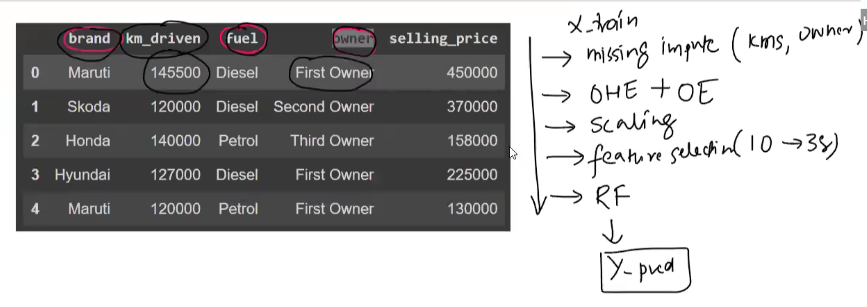

In [78]:
# Missing value imputation
# Encoding Categorical Variables
# Scaling
# Feature Selection
# Model building
# Prediction

In [79]:
df['owner'].value_counts()

First Owner             5235
Second Owner            2085
Third Owner              549
Fourth & Above Owner     173
Test Drive Car             5
Name: owner, dtype: int64

In [80]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [81]:
# missing value imputation transformer on 'km_driven' and 'owner' columns
trf1 = ColumnTransformer([
    ('impute_km_driven',SimpleImputer(),[1]), # try giving index number of column
    ('impute_owner',SimpleImputer(strategy='most_frequent'),[3])
],remainder='passthrough')

In [82]:
# encoding categorical variables
trf2 = ColumnTransformer(
    [
        ("ordinal", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), [3]),
        ("onehot", OneHotEncoder(handle_unknown='ignore', sparse_output=False), [0,2])
    ],
    remainder='passthrough'
)

In [83]:
# Scaling on all columns
trf3 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,38)) # slice(0,38) i.e total no. of cols +1 which means apply on all columns 
])

In [84]:
a = [1,2,3,4,5]
x = slice(0,5)
a[x]

[1, 2, 3, 4, 5]

In [85]:
# Feature selection -> best 10 columns
trf4 = SelectKBest(score_func=chi2,k=10)

In [86]:
# train the model
trf5 = RandomForestRegressor()

In [87]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('imputer',trf1),
    ('encoder',trf2),
    ('scaler',trf3),
    #('fselector',trf4),
    ('model',trf5)
])


In [88]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('imputer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_km_driven',
                                                  SimpleImputer(), [1]),
                                                 ('impute_owner',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [3])])),
                ('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  [3]),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 2])])),
                ('scaler',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 38, None))])),
                ('model', RandomForestRegressor())])

In [52]:
pipe.feature_names_in_

array(['brand', 'km_driven', 'fuel', 'owner'], dtype=object)

In [53]:
pipe.named_steps

{'imputer': ColumnTransformer(remainder='passthrough',
                   transformers=[('impute_km_driven', SimpleImputer(), [1]),
                                 ('impute_owner',
                                  SimpleImputer(strategy='most_frequent'),
                                  [3])]),
 'encoder': ColumnTransformer(remainder='passthrough',
                   transformers=[('ordinal',
                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                 unknown_value=-1),
                                  [3]),
                                 ('onehot',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  [0, 2])]),
 'scaler': ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, 38, None))]),
 'model': RandomForestRegressor()}

In [54]:
pipe.named_steps['imputer']

ColumnTransformer(remainder='passthrough',
                  transformers=[('impute_km_driven', SimpleImputer(), [1]),
                                ('impute_owner',
                                 SimpleImputer(strategy='most_frequent'),
                                 [3])])

In [55]:
pipe.named_steps['imputer'].transformers_[0]

('impute_km_driven', SimpleImputer(), [1])

#### mean value used for imputing in imputer column transformer

In [56]:
pipe.named_steps['imputer'].transformers_[0][1].statistics_

array([70050.98323593])

#### most frequent group which replaced missing value in owner column

In [57]:
pipe.named_steps['imputer'].transformers_[1][1].statistics_

array(['First Owner'], dtype=object)

#### find min and max of the minmax scaler of each column:

In [58]:
pipe.named_steps['scaler'].transformers_[0][1].data_max_

array([3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

In [59]:
pipe.named_steps['scaler'].transformers_[0][1].data_min_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

### Prediction : 

In [60]:
pipe.predict(X_test)[10:40]

array([780828.62422536, 780828.62422536, 442455.22162868, 780828.62422536,
       780828.62422536, 780828.62422536, 442455.22162868, 442455.22162868,
       780828.62422536, 442455.22162868, 780828.62422536, 442455.22162868,
       780828.62422536, 312148.32425167, 442455.22162868, 780828.62422536,
       780828.62422536, 780828.62422536, 780828.62422536, 442455.22162868,
       780828.62422536, 185985.17007245, 442455.22162868, 780828.62422536,
       780828.62422536, 780828.62422536, 442455.22162868, 780828.62422536,
       780828.62422536, 442455.22162868])

In [61]:
# Predict
pipe.predict(np.array(['Maruti',100000.0,'Diesel','First Owner']).reshape(1,4))

C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([780828.62422536])

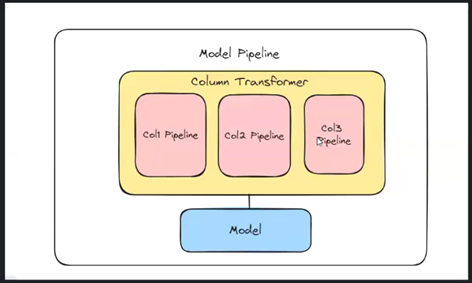

### Cross Validation

In [62]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-609629901232.6858

### Hyperparameter Tuning

https://www.freecodecamp.org/news/machine-learning-pipeline/

##### Find the Changeable Pipeline Parameters : 

In [90]:
pipe.get_params()

{'memory': None,
 'steps': [('imputer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('impute_km_driven', SimpleImputer(), [1]),
                                   ('impute_owner',
                                    SimpleImputer(strategy='most_frequent'),
                                    [3])])),
  ('encoder',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('ordinal',
                                    OrdinalEncoder(handle_unknown='use_encoded_value',
                                                   unknown_value=-1),
                                    [3]),
                                   ('onehot',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    [0, 2])])),
  ('scaler',
   ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, 38, None))])),
  ('model', Rand

In [63]:
# gridsearchcv
params = {
    'model__max_depth':[1,2,3,4,5,None]
}

In [64]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, params, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('impute_km_driven',
                                                                         SimpleImputer(),
                                                                         [1]),
                                                                        ('impute_owner',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         [3])])),
                                       ('encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinal',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         [3]),
                                                                        ('onehot',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         [0,
                                                                          2])])),
                                       ('scaler',
                                        ColumnTransformer(transformers=[('scale',
                                                                         MinMaxScaler(),
                                                                         slice(0, 38, None))])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [1, 2, 3, 4, 5, None]},
             scoring='neg_mean_squared_error')

In [65]:
grid.best_score_

-609597801421.0857

In [66]:
grid.best_params_

{'model__max_depth': None}

### Export the Pipeline